<a href="https://colab.research.google.com/github/DarwinAndrey/Senales_y_sistemas/blob/main/corte1/Cuaderno3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operaciones básicas sobre señales

Las operaciones como la superposición, el cambio temporal y el escalamiento, se utilizan para construir señales con una estructura más compleja.

Se introduce un conjunto de operaciones elementales que se utilizan frecuentemente en el procesamiento de señales.

### Superposición

La superposición $x(t)$ de dos señales $x_1(t)$ and $x_2(t)$ está dada por:

\begin{equation}
x(t) = A \cdot x_1(t) + B \cdot x_2(t)
\end{equation}

con los pesos complejos $A, B \in \mathbb{C}$.

**Ejemplo**

El siguiente ejemplo ilustra la superposición de dos señales armónicas $x(t) = A \cdot \cos(\omega_1 t) + B \cdot \cos(\omega_2 t)$ con pesos $A$, $B$ y frecuencia angular $\omega_1$ y $\omega_2$.

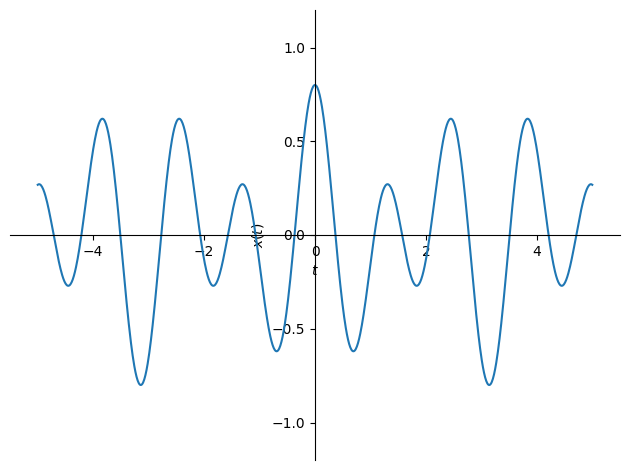

In [1]:
%matplotlib inline
import sympy as sym

t = sym.symbols('t', real=True)#se declara la variable simbólica t

#parámetros de las funciones cos
A = .3
om1 = 3
B = .5
om2 = 5

#operación superposición en sympy
x = A*sym.cos(om1*t) + B*sym.cos(om2*t)
#se grafica la señal resultante
sym.plot(x, (t,-5,5), ylim=[-1.2, 1.2], ylabel=r'$x(t)$');


### Desplazamiento temporal

El desplazamiento temporal de una señal $s(t)$ en un instante de tiempo $\tau$ es una operación frecuentemente aplicada en el procesamiento de señales. Por ejemplo, para modelar la propagación de señales desde un actuador a un sensor.

El desplazamiento de la señal $x(t)$ está definido como:

\begin{equation}
x(t) = s(t-\tau)
\end{equation}

con $\tau \in \mathbb{R}$. La señal $s(t)$ es:

* desplazada hacia la derecha (*retrasada*) para $\tau > 0$
* desplazada hacia la izquierda para $\tau < 0$

**Ejemplo**

Para ilustrar el cambio temporal de señales, la construcción de una señal escalera por una superposición de desplazamiento se define como:

\begin{equation}
x(t) = \text{rect}\left(t - \frac{1}{2} \right) + \frac{2}{3} \cdot \text{rect}\left(t-\frac{3}{2} \right) + \frac{1}{3} \cdot \text{rect} \left(t-\frac{5}{2} \right)
\end{equation}



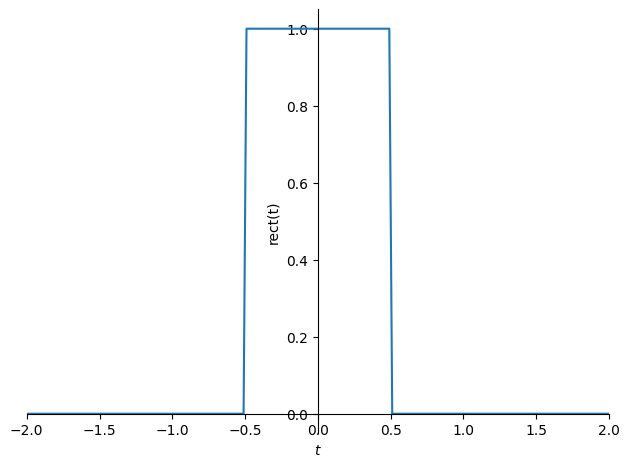

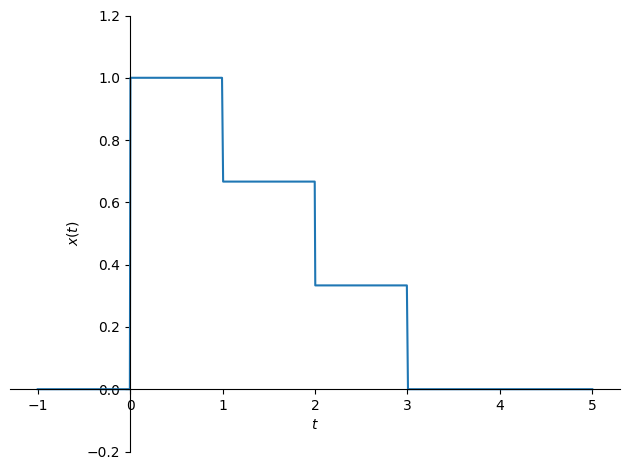

In [2]:
rect = sym.Heaviside(t + 0.5) - sym.Heaviside(t - 0.5)
sym.plot(rect, xlim=[-2,2], ylabel = r'rect(t)')
#los rect desplazados se acoplan con escalamientos diferentes
x = rect.subs(t, t-1/2) + 2/3*rect.subs(t, t-3/2) + 1/3*rect.subs(t, t-5/2)
sym.plot(x, (t, -1, 5), ylim=[-0.2, 1.2], ylabel='$x(t)$');

**Ejercicio**

* Agregar otro escalón al principio de la señal escalera modificando el ejemplo anterior.

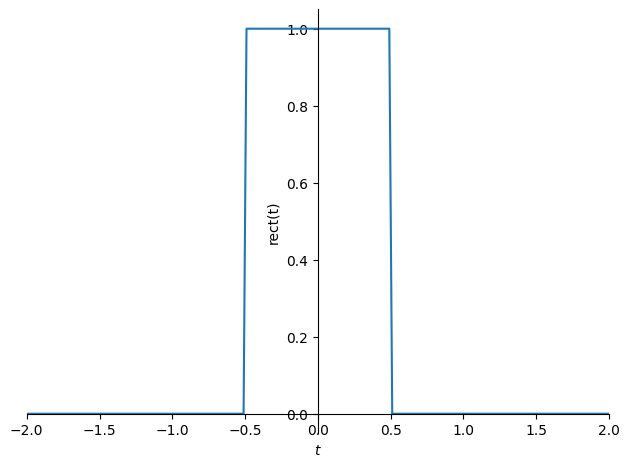

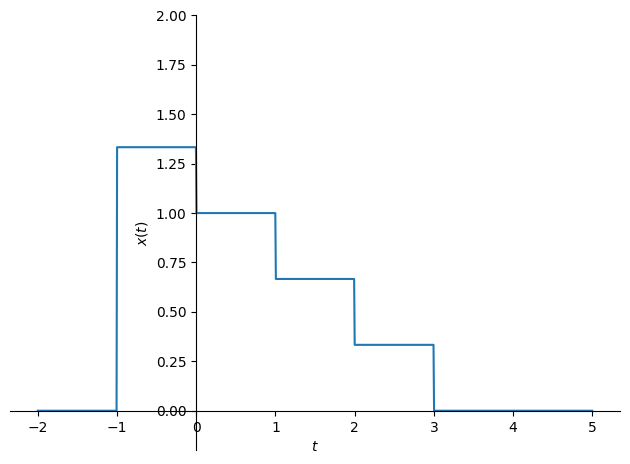

In [3]:
rect = sym.Heaviside(t + 0.5) - sym.Heaviside(t - 0.5)
sym.plot(rect, xlim=[-2,2], ylabel = r'rect(t)')
#los rect desplazados se acoplan con escalamientos diferentes
x = 4/3*rect.subs(t, t+1/2) + rect.subs(t, t-1/2) + 2/3*rect.subs(t, t-3/2) + 1/3*rect.subs(t, t-5/2)
sym.plot(x, (t, -2, 5), ylim=[-0.2, 2], ylabel='$x(t)$');

### Escalamiento temporal

El escalamiento temporal de una señal $s(t)$ está definido como:

\begin{equation}
x(t) = s(a \cdot t)
\end{equation}

con $a \in \mathbb{R}$. La señal $s(t)$ es

* estirada para $0 < a < 1$
* comprimida $a > 1$
* invertida y escalada para $a < 0$

Una aplicación de escalado temporal en el procesamiento de la señal es la escala de las señales estándar y el modelado del [efecto Doppler](https://en.wikipedia.org/wiki/Doppler_effect).

**Ejemplo**

El siguiente ejemplo ilustra el escalamiento de una señal escalera $y(t) = x(a \cdot t)$.

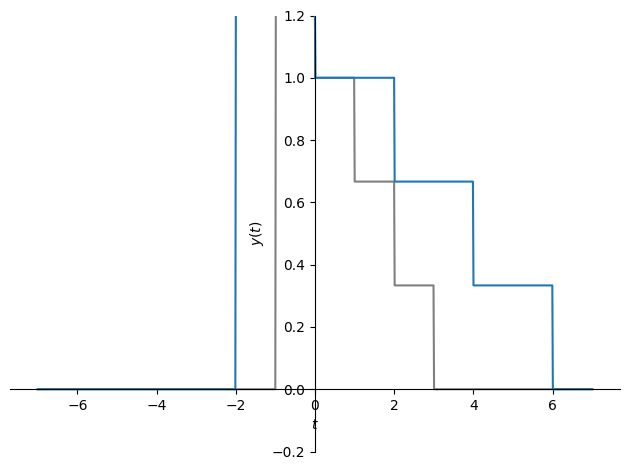

In [4]:
a = sym.symbols('a', real=True)
y = x.subs(t, a*t)

px = sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False, line_color='gray')
py = sym.plot(y.subs(a,1/2), (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)#se extiende los gráficos sobre una misma figura
px.show()

**Ejercicio**

* Modifique el ejemplo anterior para que la señal se comprima.
* Modifique el ejemplo anterior para que la señal se escale y se invierta. ¿Qué factor de escala `a`da como resultado un       estiramiento/compresión en este contexto?  




*   SEÑAL COMPRIMIDA



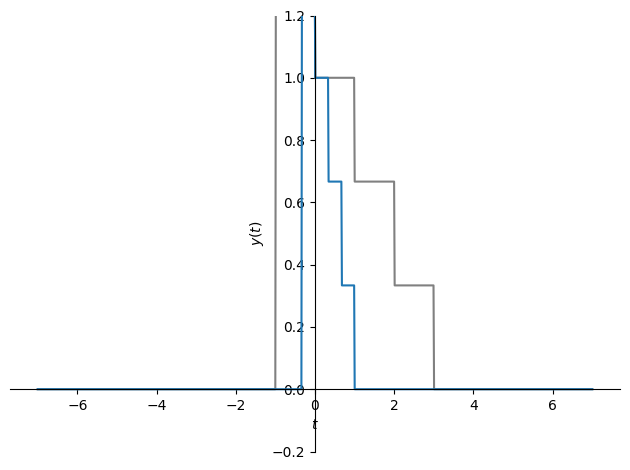

In [5]:
a = sym.symbols('a', real=True)
y = x.subs(t, a*t)

px = sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False, line_color='gray')
py = sym.plot(y.subs(a,3), (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)#se extiende los gráficos sobre una misma figura
px.show()



*  Cambiamos el valor de a, para que se comprima la señal a debe ser mayor a 1.





*   SEÑAL ESCALADA E IMVERTIDA

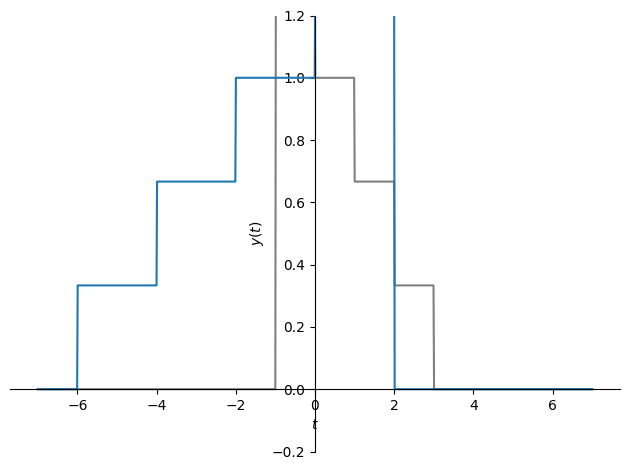

In [6]:
a = sym.symbols('a', real=True)
y = x.subs(t, a*t)

px = sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False, line_color='gray')
py = sym.plot(y.subs(a,-1/2), (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)#se extiende los gráficos sobre una misma figura
px.show()

*  Cambiamos el valor de a, para que se escale e invierta la señal, a debe ser menor a 0 (numero negativo).



### Desplazamiento Temporal

El desplazamiento temporal de una señal $s(t)$ está definido como

\begin{equation}
x(t) = s(\tau - t)
\end{equation}

para $\tau \in \mathbb{R}$. Como $s(\tau - t) = s(- (t - \tau))$ la operación espejo también se puede representar como una inversión temporal de la señal $s(t)$ seguida por un desplazamiento de $\tau$ de la señal invertida. Para $\tau = 0$ este resultado es solo una inversión temporal de la señal.

La operación de cambio temporal puede interpretarse geométricamente como un reflejo de la señal $s(t)$ en el eje vertical $t=\frac{\tau}{2}$.

**Ejemplo**

El siguiente ejemplo ilustra el cambio temporal $y(t) = x(\tau - t)$ de la señal escalera $x(t)$ anteriormente introducida.

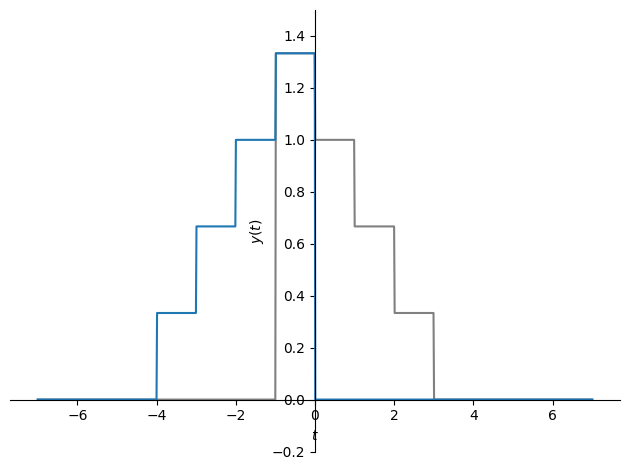

In [7]:
tau =-1
y = x.subs(t, tau - t)

px=sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', line_color='gray', show=False)
py=sym.plot(y, (t, -7, 7), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', show=False)
px.extend(py)
px.show()

**Ejercicio**

* Para que valor de $\tau$, ¿la señal comienza en $t=0$?
* Realice un cambio temporal dividiendo en dos operaciones consecutivas: (i) Inversión temporal y (ii) Desplazamiento temporal.



*   Como podemos observar en el ejemplo anterior con tau=-1 la señal comienza en -4.
para que la señal comienze en t=0 debemos sumarle 4 a tau.



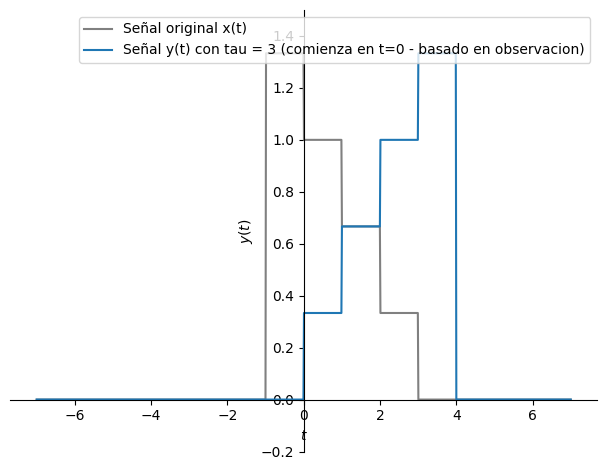

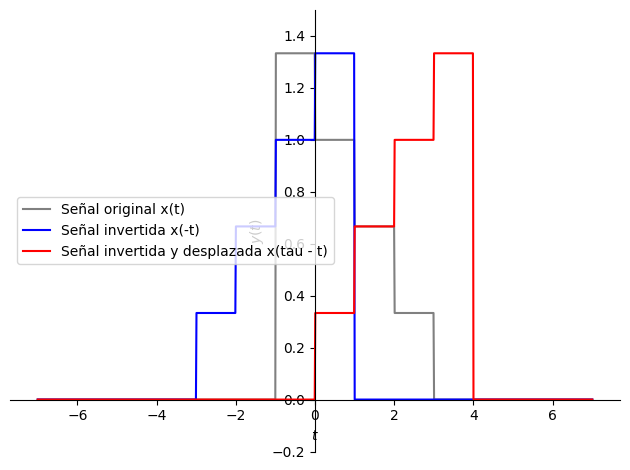

In [8]:
# %% [markdown]
# **Ejercicio**
#
# * Para que valor de $\tau$, ¿la señal comienza en $t=0$?
# * Realice un cambio temporal dividiendo en dos operaciones consecutivas: (i) Inversión temporal y (ii) Desplazamiento temporal.
# %% [markdown]
#
#
# *   **Parte 1: Para que valor de $\tau$, ¿la señal comienza en $t=0$?**
#
# Observando las visualizaciones de la señal transformada $y(t) = x(\tau - t)$ con diferentes valores de $\tau$, parece que un valor de $\tau = 3$ resulta en que el borde izquierdo del primer escalón de la señal transformada se alinee con $t=0$. Esto implica que la parte de la señal original $x(t)$ que se mapea a $t=0$ en la señal transformada, es el punto $t_{original} = \tau - 0 = 3$. Este punto $t=3$ en la señal original se encuentra dentro del último escalón. Basándonos en la observación del gráfico, el valor de $\tau$ que hace que la señal transformada comience en $t=0$ es $3$.
#
#
# %%
# Parte 1: Encontrar el valor de tau para que la señal comience en t=0
# Basandonos en la observacion visual de los graficos, usaremos tau = 3.
tau_para_inicio_cero = 3

y_inicio_cero = x.subs(t, tau_para_inicio_cero - t)

# Graficar la señal con tau para que comience en t=0
px_inicio_cero = sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', line_color='gray', show=False, legend=True)
py_inicio_cero = sym.plot(y_inicio_cero, (t, -7, 7), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', show=False, legend=True)

px_inicio_cero[0].label = 'Señal original x(t)'
py_inicio_cero[0].label = f'Señal y(t) con tau = {tau_para_inicio_cero} (comienza en t=0 - basado en observacion)'

px_inicio_cero.extend(py_inicio_cero)
px_inicio_cero.show()

# %% [markdown]
# *   **Parte 2: Realice un cambio temporal dividiendo en dos operaciones consecutivas: (i) Inversión temporal y (ii) Desplazamiento temporal.**
#
# La operación de cambio temporal $s(\tau - t)$ puede entenderse como dos operaciones consecutivas sobre la señal original $s(t)$:
#
# 1.  **Inversión Temporal:** La señal $s(t)$ se invierte temporalmente para obtener $s(-t)$.
# 2.  **Desplazamiento Temporal:** La señal invertida $s(-t)$ se desplaza temporalmente por un valor de $\tau$. Un desplazamiento positivo de $\tau$ significa reemplazar la variable de tiempo $t$ por $t - \tau$ en la expresión de la señal invertida, obteniendo $s(-(t - \tau))$, que es igual a $s(\tau - t)$.
#
# A continuación, visualizamos la señal original, la señal invertida, y la señal invertida y desplazada para demostrar esta equivalencia.
# %%
# Parte 2: Realizar un cambio temporal dividiendo en dos operaciones
# (i) Inversión temporal y (ii) Desplazamiento temporal.

# La señal original es x(t)

# Paso (i): Inversión temporal
# Aplicamos la transformacion t -> -t a la señal original x(t)
inversion_temporal = x.subs(t, -t)

# Paso (ii): Desplazamiento temporal de la señal invertida
# Aplicamos un desplazamiento de tau a la señal invertida.
# La operacion x(tau - t) es equivalente a x(-(t - tau)).
# Esto se logra desplazando la señal invertida (x(-t)) por tau.
tau_desplazamiento = tau_para_inicio_cero # Usamos el mismo valor de tau encontrado en la Parte 1 (tau = 3)

desplazamiento_senal_invertida = inversion_temporal.subs(t, t - tau_desplazamiento)

# Ahora graficamos la señal original, la señal invertida, y la señal invertida y desplazada
# Creamos un plot para cada señal
px_original_part2 = sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', line_color='gray', show=False, legend=True)
py_invertida_part2 = sym.plot(inversion_temporal, (t, -7, 7), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', line_color='blue', show=False, legend=True)
py_inv_desp_part2 = sym.plot(desplazamiento_senal_invertida, (t, -7, 7), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', line_color='red', show=False, legend=True)

# Agregamos leyendas
px_original_part2[0].label = 'Señal original x(t)'
py_invertida_part2[0].label = 'Señal invertida x(-t)'
py_inv_desp_part2[0].label = 'Señal invertida y desplazada x(tau - t)'

# Extendemos los graficos sobre una misma figura
px_original_part2.extend(py_invertida_part2)
px_original_part2.extend(py_inv_desp_part2)

# Mostramos el grafico combinado
px_original_part2.show()

**Copyright**

The notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebook for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Signals and Systems* by Sascha Spors.